In [2]:
pip install palmerpenguins

Note: you may need to restart the kernel to use updated packages.


In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from palmerpenguins import load_penguins

In [4]:
plt.style.use('ggplot')
pd.set_option('display.max_columns', None)
penguins = load_penguins()

In [5]:
penguins.info()
penguins.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
 7   year               344 non-null    int64  
dtypes: float64(4), int64(1), object(3)
memory usage: 21.6+ KB


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [6]:
penguins.columns

Index(['species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex', 'year'],
      dtype='object')

In [7]:
penguins = penguins[[
    'species', #'island',
    'bill_length_mm', 'bill_depth_mm',
    'flipper_length_mm', 'body_mass_g' #'sex', #'year'
    ]].copy()

penguins.columns

Index(['species', 'bill_length_mm', 'bill_depth_mm', 'flipper_length_mm',
       'body_mass_g'],
      dtype='object')

In [8]:
penguins.isna().sum()

species              0
bill_length_mm       2
bill_depth_mm        2
flipper_length_mm    2
body_mass_g          2
dtype: int64

In [9]:
penguins.dropna(subset=['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g'], inplace=True)
penguins.isna().sum()

species              0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
dtype: int64

In [10]:
penguins.loc[penguins.duplicated()]

,species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g


In [11]:
print(penguins)

       species  bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g
0       Adelie            39.1           18.7              181.0       3750.0
1       Adelie            39.5           17.4              186.0       3800.0
2       Adelie            40.3           18.0              195.0       3250.0
4       Adelie            36.7           19.3              193.0       3450.0
5       Adelie            39.3           20.6              190.0       3650.0
..         ...             ...            ...                ...          ...
339  Chinstrap            55.8           19.8              207.0       4000.0
340  Chinstrap            43.5           18.1              202.0       3400.0
341  Chinstrap            49.6           18.2              193.0       3775.0
342  Chinstrap            50.8           19.0              210.0       4100.0
343  Chinstrap            50.2           18.7              198.0       3775.0

[342 rows x 5 columns]


/home/jakubbaransky/miniconda3/envs/Archiv/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


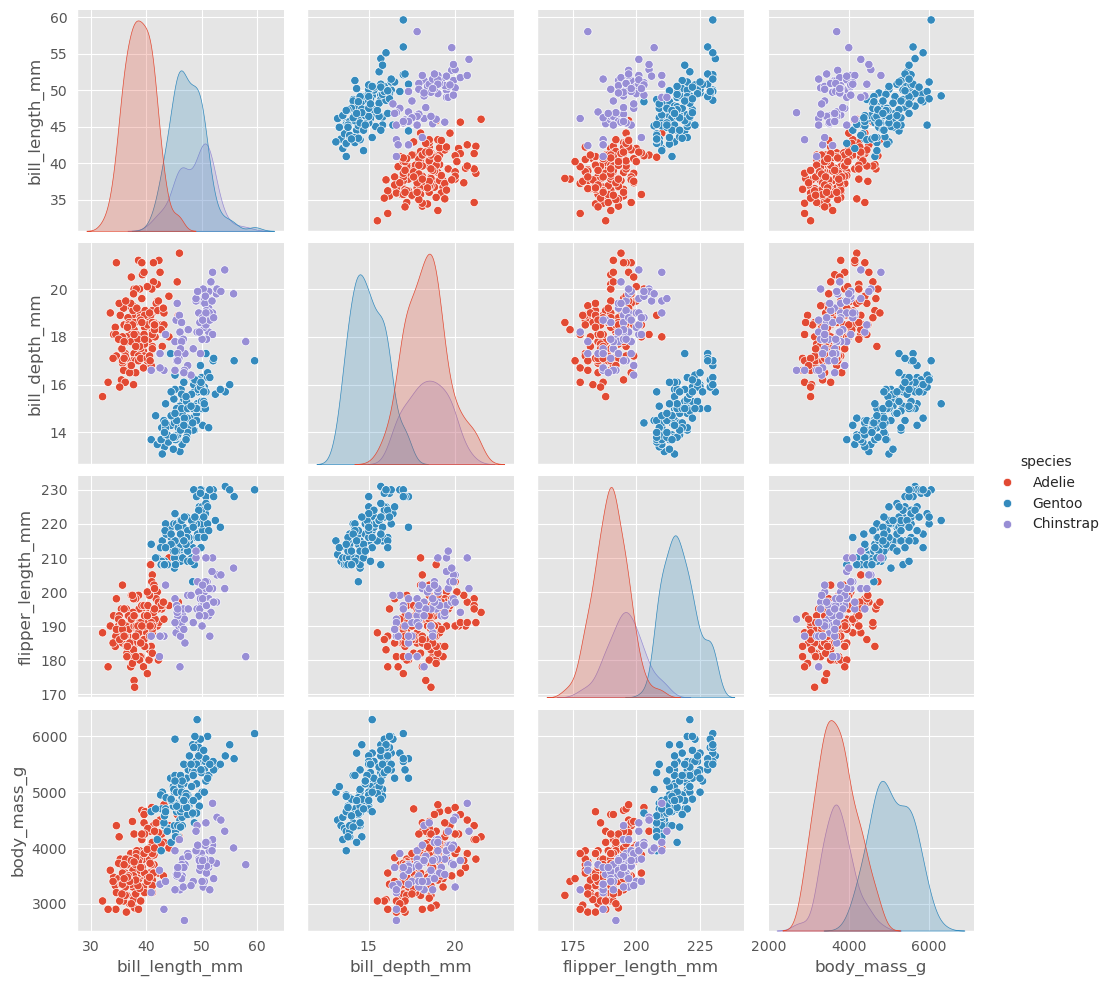

In [12]:
sns.pairplot(penguins, hue="species")
plt.show()

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

# Extract features and labels
X = penguins.iloc[:, 1:].values
y = penguins.iloc[:, 0]

# Normalize features
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)

# Encode labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [14]:
print(y_encoded)
print(X_normalized)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1]
[[0.25454545 0.66666667 0.15254237 0.29166667]
 [0.26909091 0.51190476 0.23728814 0.30555556]
 [0.29818182 0.58333333 0.38983051 0.15277778]
 ...
 [0.63636364 0.60714286 0.3559322  0.29861111]
 [0.68       0.70238095 0.6440678  0.38888889]
 [0.65818182 0.66666667 0.44067797 0.29861111]]


In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_normalized, y_encoded, test_size=0.2, random_state=0)

In [17]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

def create_model(topology):
    model = Sequential()
    for layer_specs in topology:
        model.add(Dense(layer_specs[0], input_dim=4, activation=layer_specs[1]))
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

topology1 = [(16, 'relu'), (8, 'relu'), (3, 'softmax')]
topology2 = [(32, 'relu'), (16, 'relu'), (8, 'relu'), (3, 'softmax')]
topology3 = [(8, 'relu'), (8, 'relu'), (3, 'softmax')]
topology4 = [(32, 'relu'), (16, 'relu'), (3, 'softmax')]
topology5 = [(16, 'relu'), (16, 'relu'), (8, 'relu'), (3, 'softmax')]

topologies = [topology1, topology2, topology3, topology4, topology5]

best_accuracy = 0.0
best_topology = None

for i, topology in enumerate(topologies, 1):
    print(f"Training Model {i} with Topology: {topology}")
    model = create_model(topology)
    model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.1)
    accuracy = model.evaluate(X_test, y_test)[1]

    print(f'Test Accuracy for Model {i}: {accuracy}\n')

    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_topology = topology

print(f'The best topology is: {best_topology} with accuracy: {best_accuracy}')

2024-10-31 11:19:25.998844: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Training Model 1 with Topology: [(16, 'relu'), (8, 'relu'), (3, 'softmax')]


2024-10-31 11:19:28.567605: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


Epoch 1/20
8/8 [==============================] - 1s 56ms/step - loss: 1.1208 - accuracy: 0.4286 - val_loss: 1.1436 - val_accuracy: 0.3571
Epoch 2/20
8/8 [==============================] - 0s 28ms/step - loss: 1.1088 - accuracy: 0.4286 - val_loss: 1.1318 - val_accuracy: 0.3571
Epoch 3/20
8/8 [==============================] - 0s 33ms/step - loss: 1.0982 - accuracy: 0.4286 - val_loss: 1.1214 - val_accuracy: 0.3571
Epoch 4/20
8/8 [==============================] - 0s 35ms/step - loss: 1.0899 - accuracy: 0.4286 - val_loss: 1.1117 - val_accuracy: 0.3571
Epoch 5/20
8/8 [==============================] - 0s 28ms/step - loss: 1.0830 - accuracy: 0.4286 - val_loss: 1.1027 - val_accuracy: 0.3571
Epoch 6/20
8/8 [==============================] - 0s 30ms/step - loss: 1.0754 - accuracy: 0.4286 - val_loss: 1.0955 - val_accuracy: 0.3571
Epoch 7/20
8/8 [==============================] - 0s 20ms/step - loss: 1.0686 - accuracy: 0.4286 - val_loss: 1.0878 - val_accuracy: 0.3571
Epoch 8/20
8/8 [===========

In [18]:
learning_rates = [0.001, 0.01, 0.1, 0.2, 0.5]

best_accuracy = 0.0
best_learning_rate = None

for learning_rate in learning_rates:
  print(f"Training Model with Topology: {best_topology} and Learning Rate: {learning_rate}")
  model = create_model(best_topology)
  optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
  model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
  model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.1)
  accuracy = model.evaluate(X_test, y_test)[1]

  print(f'Test Accuracy for Model {best_topology} with Learning Rate {learning_rate}: {accuracy}\n')

  if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_learning_rate = learning_rate

print(f'The best topology is: {best_topology} with learning rate: {best_learning_rate} and accuracy: {best_accuracy}')

Training Model with Topology: [(32, 'relu'), (16, 'relu'), (8, 'relu'), (3, 'softmax')] and Learning Rate: 0.001
Epoch 1/20
8/8 [==============================] - 2s 75ms/step - loss: 1.0810 - accuracy: 0.6204 - val_loss: 1.0640 - val_accuracy: 0.7500
Epoch 2/20
8/8 [==============================] - 0s 47ms/step - loss: 1.0499 - accuracy: 0.6735 - val_loss: 1.0359 - val_accuracy: 0.7143
Epoch 3/20
8/8 [==============================] - 0s 33ms/step - loss: 1.0254 - accuracy: 0.6041 - val_loss: 1.0082 - val_accuracy: 0.5714
Epoch 4/20
8/8 [==============================] - 0s 16ms/step - loss: 0.9998 - accuracy: 0.5633 - val_loss: 0.9821 - val_accuracy: 0.6786
Epoch 5/20
8/8 [==============================] - 0s 35ms/step - loss: 0.9742 - accuracy: 0.6571 - val_loss: 0.9558 - val_accuracy: 0.7857
Epoch 6/20
8/8 [==============================] - 0s 15ms/step - loss: 0.9480 - accuracy: 0.7347 - val_loss: 0.9273 - val_accuracy: 0.7857
Epoch 7/20
8/8 [==============================] - 0s 

In [19]:
from sklearn.metrics import confusion_matrix, classification_report

best_model = create_model(best_topology)

best_model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.1)

# Evaluate on the test set
y_prob = best_model.predict(X_test)
y_pred = np.argmax(y_prob, axis=1)

conf_matrix = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:")
print(conf_matrix)

# You can also print a classification report for more detailed metrics
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Epoch 1/20
8/8 [==============================] - 1s 47ms/step - loss: 1.0999 - accuracy: 0.2327 - val_loss: 1.0738 - val_accuracy: 0.4643
Epoch 2/20
8/8 [==============================] - 0s 24ms/step - loss: 1.0559 - accuracy: 0.5878 - val_loss: 1.0448 - val_accuracy: 0.5000
Epoch 3/20
8/8 [==============================] - 0s 20ms/step - loss: 1.0192 - accuracy: 0.6571 - val_loss: 1.0139 - val_accuracy: 0.6071
Epoch 4/20
8/8 [==============================] - 0s 26ms/step - loss: 0.9857 - accuracy: 0.7959 - val_loss: 0.9856 - val_accuracy: 0.7500
Epoch 5/20
8/8 [==============================] - 0s 21ms/step - loss: 0.9542 - accuracy: 0.8612 - val_loss: 0.9581 - val_accuracy: 0.8214
Epoch 6/20
8/8 [==============================] - 0s 22ms/step - loss: 0.9206 - accuracy: 0.8857 - val_loss: 0.9253 - val_accuracy: 0.8571
Epoch 7/20
8/8 [==============================] - 0s 19ms/step - loss: 0.8816 - accuracy: 0.8939 - val_loss: 0.8904 - val_accuracy: 0.8929
Epoch 8/20
8/8 [===========